In [127]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
db_path = '/Users/soya/Lecture/DSprg2_2/suumo/suumo.db'
conn = sqlite3.connect(db_path)

In [129]:

query = "SELECT name,min,price FROM suumo;"
df = pd.read_sql_query(query,conn)

df


,name,min,price
0,ＪＲ京浜東北線 大井町駅 2階建 築63年,11,9.50
1,ＪＲ山手線 大崎駅 2階建 築73年,10,7.00
2,京急本線 新馬場駅 2階建 築75年,7,4.78
3,【早崎荘】,7,7.00
4,京急本線 新馬場駅 2階建 築68年,5,13.00
...,...,...,...
1928,ＴＨＥ ＰＡＬＭＳ東大井,3,13.10
1929,都営浅草線 戸越駅 4階建 築1年,3,10.70
1930,アーバンパーク品川豊町,3,18.50
1931,ＪＲ横須賀線 西大井駅 15階建 新築,4,9.90


In [130]:
min_group = df.groupby('min')

In [131]:
min_median = min_group.median(numeric_only = True)
min_median

,price
min,
1,9.750
2,9.800
3,9.400
4,10.200
5,9.800
6,9.600
7,9.000
8,9.125
9,10.300


In [132]:
df_min_up = df.sort_values('min')
df_min_up

,name,min,price
360,ヴィーナスビル,1,6.50
1270,東急池上線 戸越銀座駅 15階建 築18年,1,12.10
441,メゾンド星山,1,8.20
1040,豊洲シエルタワー,1,22.50
1653,メインステージ南品川,1,7.80
...,...,...,...
203,ＪＲ山手線 大崎駅 2階建 築39年,20,5.20
1596,スカイコート品川パークサイドIII,20,8.98
895,ヴェローナ大井南ルッソグランデ,20,8.00
1188,ＪＲ山手線 品川駅 15階建 築6年,20,10.40


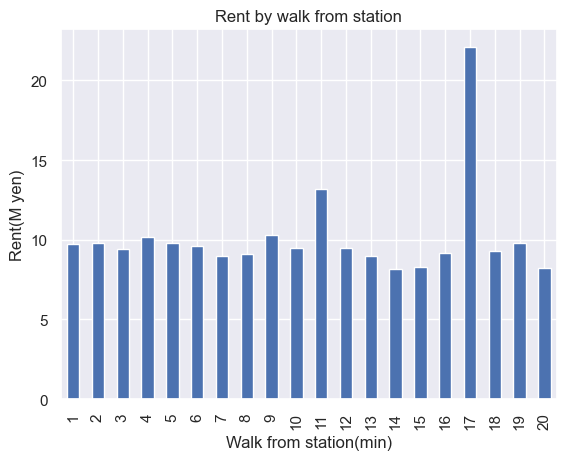

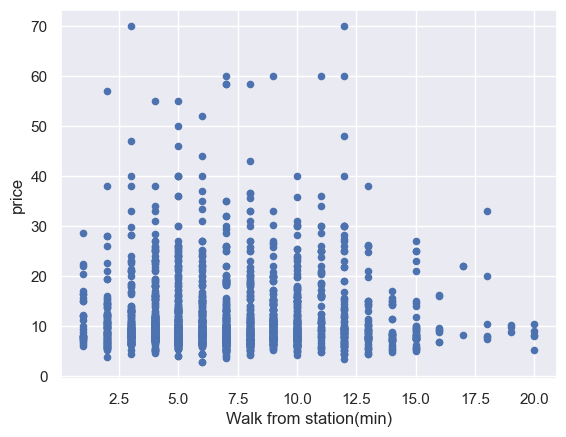

,min,price
min,1.000000,0.012087
price,0.012087,1.000000


In [133]:
#棒グラフを描画
# 横軸の表示名を「駅徒歩(分)」にするには、x='min'をxlabel='駅徒歩(分)'に変更
min_median.plot(kind='bar',xlabel='Walk from station(min)',y='price', ylabel='Rent(M yen)',title='Rent by walk from station',legend=False)

#散布図を描画
# y < 80 でフィルタリング
df_80 = df_min_up[df_min_up['price'] < 80]
df_80.plot(kind='scatter',x='min',xlabel='Walk from station(min)',y='price')


plt.show()

df[['min','price']].corr()